# Building a neural network in Keras with Tensorflow #

### A walkthrough for the Stockholm Machine Learning Club

The goal is to demonstrate how to build a simple neural network using Keras, a popular open source neural network library.

This demonstration uses images of digits expressed in sign language, collected by Turkey Ankara Ayrancı Anadolu High School Students (https://www.kaggle.com/ardamavi/sign-language-digits-dataset)

## To follow along:
If you want to follow along on your own machine then please complete the setup steps below to install everything you need. You can get the data from my github repo (https://github.com/jo-gay/keras_demo) or the original from the Kaggle (link above). The data is in npy format which is easy to load using numpy.

### Setup steps:
The code given for each step assumes you are using <code>conda</code>. If not, you will need to adapt it!
#### Warning: Keras and Tensorflow have a lot of dependencies - it will take a while to install them all.
- Create new environment and activate it (e.g. <code>conda create -n keras_demo</code>; <code> conda activate keras_demo</code>)
- Install python and packages per requirements.txt (<code>conda install --file requirements.txt</code>)

<old>
- Install Jupyter Notebooks in the new environment (<code>conda install jupyter</code>)
- Set up Jupyter to use environments (<code>conda install nb_conda</code>)
</old>

TODO requirements.txt

- python
- tensorflow
- keras
- matplotlib
- numpy particular version 16.4.? to avoid TF warnings

In [1]:
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(20200129)

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
data_path = "./Sign-language-digits-dataset/"

In [4]:
X = np.load(os.path.join(data_path, 'X.npy'))
y = np.load(os.path.join(data_path, 'y.npy'))

In [5]:
samples, im_width, im_height = X.shape
_, num_classes = y.shape
print(f"Loaded {samples} images of size {im_width} x {im_height}, labelled with {num_classes} classes")

Loaded 2062 images of size 64 x 64, labelled with 10 classes


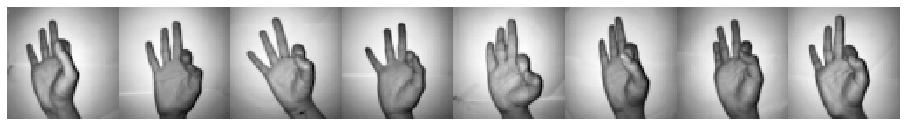

In [6]:
plt.figure(figsize=(16,6))
plt.imshow(np.hstack([X[i] for i in range(8)]), cmap='gray')
plt.axis('off');

<em> Note to self: order of data is not random! All these images are of the digit nine.</em>

<em> Also: class index does not correspond to digit being shown </em>

In [7]:
class_to_digit_map = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2, 9:5}

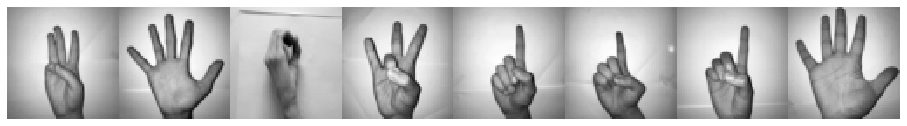

       6              5              0              7              1              1              1              5       


In [8]:
examples = np.random.choice(samples, 8)
plt.figure(figsize=(16,6))
plt.imshow(np.hstack([X[i] for i in examples]), cmap='gray')
plt.axis('off')
plt.show()
print(''.join(['{:^15d}'.format(class_to_digit_map[np.argmax(y[i])]) for i in examples]))

### Randomly select training, validation and test datasets

In [9]:
random_idxs = np.random.permutation(samples) # all the indices in a random order
m = int(samples * 0.6)
test_size = (samples - m) // 2
X_train, y_train = X[random_idxs[:m]], y[random_idxs[:m]]
X_validate, y_validate = X[random_idxs[m:(m + test_size)]], y[random_idxs[m:(m + test_size)]]
X_test, y_test = X[random_idxs[-test_size:]], y[random_idxs[-test_size:]]
# Check we have a reasonable number of examples of each class in each set
sum(y_train), sum(y_validate), sum(y_test)

(array([127., 126., 125., 128., 122., 129., 112., 126., 118., 124.]),
 array([37., 35., 47., 52., 44., 30., 52., 42., 37., 36.]),
 array([40., 44., 33., 27., 40., 49., 43., 38., 51., 47.]))

## Part 2: Build a neural network with Keras

Now that we have our training, validation and test sets, with the associated labels, we can train a neural network.

In [10]:
## Keras imports
from keras import models
from keras import layers
from keras import regularizers
from keras import callbacks

In [31]:
## Create the model and add some layers
model = models.Sequential()

# First (hidden) layer includes the dimension of the training feature vectors (N)
# The input layer is automatically added.
model.add(layers.Dense(32, input_dim=im_width*im_height, activation='relu'))

## Optional additional layers
# Standard fully connected layer
model.add(layers.Dense(32, activation='relu'))
# ... can add more layers here... see later.

# Output layer has 10 elements (one for each class, multi-class logistic regression) and uses softmax activation
model.add(layers.Dense(num_classes, activation='softmax'))

In [32]:
## Compile the model, choosing optimizer, loss function (e.g. mean squared error for regression), 
#  and metrics that we want to keep track of.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                131104    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________


In [33]:
X_train_flattened = np.reshape(X_train, (-1, im_width*im_height))
X_validate_flattened = np.reshape(X_validate, (-1, im_width*im_height))

In [34]:
## Run the training process
model.fit(X_train_flattened, y_train, epochs=150, batch_size=128)

Epoch 1/150
1237/1237 [==============================] - 0s 378us/step - loss: 2.3573 - acc: 0.1075
Epoch 2/150
1237/1237 [==============================] - 0s 53us/step - loss: 2.2961 - acc: 0.1011
Epoch 3/150
1237/1237 [==============================] - 0s 54us/step - loss: 2.2951 - acc: 0.1132
Epoch 4/150
1237/1237 [==============================] - 0s 56us/step - loss: 2.2879 - acc: 0.1067
Epoch 5/150
1237/1237 [==============================] - 0s 56us/step - loss: 2.2894 - acc: 0.1051
Epoch 6/150
1237/1237 [==============================] - 0s 70us/step - loss: 2.2730 - acc: 0.1140
Epoch 7/150
1237/1237 [==============================] - 0s 65us/step - loss: 2.2613 - acc: 0.1374
Epoch 8/150
1237/1237 [==============================] - 0s 62us/step - loss: 2.2487 - acc: 0.1439
Epoch 9/150
1237/1237 [==============================] - 0s 53us/step - loss: 2.2350 - acc: 0.1423
Epoch 10/150
1237/1237 [==============================] - 0s 57us/step - loss: 2.2183 - acc: 0.1536
Epoch 11

1237/1237 [==============================] - 0s 53us/step - loss: 1.7724 - acc: 0.2902
Epoch 84/150
1237/1237 [==============================] - 0s 54us/step - loss: 1.7744 - acc: 0.2797
Epoch 85/150
1237/1237 [==============================] - 0s 50us/step - loss: 1.7839 - acc: 0.2918
Epoch 86/150
1237/1237 [==============================] - 0s 52us/step - loss: 1.7536 - acc: 0.2902
Epoch 87/150
1237/1237 [==============================] - 0s 52us/step - loss: 1.7558 - acc: 0.2765
Epoch 88/150
1237/1237 [==============================] - 0s 52us/step - loss: 1.7310 - acc: 0.3023
Epoch 89/150
1237/1237 [==============================] - 0s 52us/step - loss: 1.7189 - acc: 0.3015
Epoch 90/150
1237/1237 [==============================] - 0s 49us/step - loss: 1.7358 - acc: 0.3015
Epoch 91/150
1237/1237 [==============================] - 0s 56us/step - loss: 1.7825 - acc: 0.2821
Epoch 92/150
1237/1237 [==============================] - 0s 61us/step - loss: 1.7372 - acc: 0.3064
Epoch 93/150


In [35]:
model.evaluate(X_validate_flattened, y_validate)

412/412 [==============================] - 0s 322us/step


[1.8948508512626574, 0.2718446607728606]

In [36]:
val_predictions = model.predict(X_validate_flattened)

In [43]:
sum(np.argmax(val_predictions, axis=1) == np.argmax(y_validate, axis=1))

112

#### <i>Note: The outcome of the above training is highly variable depending on whether you got lucky with initial weights</i>

### Try slightly bigger model
We didn't get a very good accuracy level on the training data, so let's try adding more layers. Since we already seem to be slightly overfitting, let's also add some dropout layers

In [16]:
## Create the model and add some layers
model = models.Sequential()

# First (hidden) layer includes the dimension of the training feature vectors (N)
# The input layer is automatically added.
model.add(layers.Dense(128, input_dim=im_width*im_height, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.25))

# Output layer with one node for each output class
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
## Compile the model, choosing optimizer, loss function (e.g. mean squared error for regression), 
#  and metrics that we want to keep track of.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total para

In [18]:
## Run the training process
model.fit(X_train_flattened, y_train, epochs=200, batch_size=128)

Epoch 1/200
1237/1237 [==============================] - 1s 453us/step - loss: 2.4447 - acc: 0.1002
Epoch 2/200
1237/1237 [==============================] - 0s 145us/step - loss: 2.3076 - acc: 0.1132
Epoch 3/200
1237/1237 [==============================] - 0s 150us/step - loss: 2.3117 - acc: 0.1075
Epoch 4/200
1237/1237 [==============================] - 0s 159us/step - loss: 2.2874 - acc: 0.1277
Epoch 5/200
1237/1237 [==============================] - 0s 139us/step - loss: 2.2624 - acc: 0.1576
Epoch 6/200
1237/1237 [==============================] - 0s 129us/step - loss: 2.2281 - acc: 0.1795
Epoch 7/200
1237/1237 [==============================] - 0s 135us/step - loss: 2.1768 - acc: 0.1964
Epoch 8/200
1237/1237 [==============================] - 0s 139us/step - loss: 2.1039 - acc: 0.2280
Epoch 9/200
1237/1237 [==============================] - 0s 138us/step - loss: 1.9831 - acc: 0.2757
Epoch 10/200
1237/1237 [==============================] - 0s 135us/step - loss: 1.9167 - acc: 0.2935

1237/1237 [==============================] - 0s 135us/step - loss: 0.5077 - acc: 0.8319
Epoch 82/200
1237/1237 [==============================] - 0s 138us/step - loss: 0.5062 - acc: 0.8310
Epoch 83/200
1237/1237 [==============================] - 0s 144us/step - loss: 0.4842 - acc: 0.8270
Epoch 84/200
1237/1237 [==============================] - 0s 147us/step - loss: 0.5221 - acc: 0.8213
Epoch 85/200
1237/1237 [==============================] - 0s 144us/step - loss: 0.5733 - acc: 0.7955
Epoch 86/200
1237/1237 [==============================] - 0s 139us/step - loss: 0.5181 - acc: 0.8205
Epoch 87/200
1237/1237 [==============================] - 0s 135us/step - loss: 0.4679 - acc: 0.8383
Epoch 88/200
1237/1237 [==============================] - 0s 130us/step - loss: 0.5504 - acc: 0.8108
Epoch 89/200
1237/1237 [==============================] - 0s 136us/step - loss: 0.5576 - acc: 0.8011
Epoch 90/200
1237/1237 [==============================] - 0s 146us/step - loss: 0.4213 - acc: 0.8561
Epo

1237/1237 [==============================] - 0s 164us/step - loss: 0.2151 - acc: 0.9175
Epoch 161/200
1237/1237 [==============================] - 0s 138us/step - loss: 0.5266 - acc: 0.8092
Epoch 162/200
1237/1237 [==============================] - 0s 134us/step - loss: 0.3690 - acc: 0.8698
Epoch 163/200
1237/1237 [==============================] - 0s 138us/step - loss: 0.2428 - acc: 0.9127
Epoch 164/200
1237/1237 [==============================] - ETA: 0s - loss: 0.2231 - acc: 0.927 - 0s 149us/step - loss: 0.2273 - acc: 0.9216
Epoch 165/200
1237/1237 [==============================] - 0s 148us/step - loss: 0.2101 - acc: 0.9289
Epoch 166/200
1237/1237 [==============================] - 0s 138us/step - loss: 0.2667 - acc: 0.9038
Epoch 167/200
1237/1237 [==============================] - 0s 135us/step - loss: 0.2317 - acc: 0.9143
Epoch 168/200
1237/1237 [==============================] - 0s 135us/step - loss: 0.2821 - acc: 0.9046
Epoch 169/200
1237/1237 [==============================] -

In [19]:
model.evaluate(X_validate_flattened, y_validate, batch_size=128)

412/412 [==============================] - 0s 242us/step


[0.9287448033545781, 0.7500000017360576]

### Use a CNN instead
<em>This section uses the alternative 'functional' syntax of Keras instead of the Sequential() model above</em>

In [20]:
input_layer = layers.Input(shape=(im_width,im_height,1))
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(input_layer)
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(hidden_layers)
hidden_layers = layers.Flatten()(hidden_layers)
output_layer = layers.Dense(10, activation='softmax')(hidden_layers)
model = models.Model(inputs=input_layer, outputs=output_layer)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                576010    
Total params: 578,490
Trainable params: 578,490
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train_cnn = np.reshape(X_train, (-1, im_width, im_height, 1)) #'channels last' format for tensorflow image data
X_validate_cnn = np.reshape(X_validate, (-1, im_width, im_height, 1))
X_train_cnn.shape

(1237, 64, 64, 1)

In [23]:
## Run the training process
model.fit(X_train_cnn, y_train, epochs=30, batch_size=128)

Epoch 1/30
1237/1237 [==============================] - 4s 4ms/step - loss: 2.2670 - acc: 0.1787
Epoch 2/30
1237/1237 [==============================] - 4s 3ms/step - loss: 1.8596 - acc: 0.6621
Epoch 3/30
1237/1237 [==============================] - 4s 4ms/step - loss: 1.3129 - acc: 0.7316
Epoch 4/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.8481 - acc: 0.7696
Epoch 5/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.5980 - acc: 0.8213
Epoch 6/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.4282 - acc: 0.8715
Epoch 7/30
1237/1237 [==============================] - 4s 4ms/step - loss: 0.3056 - acc: 0.9159
Epoch 8/30
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2404 - acc: 0.9418
Epoch 9/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.1956 - acc: 0.9588
Epoch 10/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.1539 - acc: 0.9709
Epoch 11/30
1237/1237 [======

In [24]:
model.evaluate(X_validate_cnn, y_validate, batch_size=128)

412/412 [==============================] - 1s 2ms/step


[0.9715225193107012, 0.77427184523888]

#### <i>Note: The results of the above training are very reliable. Unlike the fully connected network above, the cnn gets to 100% accuracy (on this dataset) every time </i>

### Add some regularization

In [25]:
input_layer = layers.Input(shape=(im_width,im_height,1))
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(input_layer)
hidden_layers = layers.Dropout(rate=0.25)(hidden_layers)
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(hidden_layers)
hidden_layers = layers.Dropout(rate=0.25)(hidden_layers)
hidden_layers = layers.Flatten()(hidden_layers)
output_layer = layers.Dense(10, activation='softmax')(hidden_layers)
model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                576010    
Total para

In [26]:
model.fit(X_train_cnn, y_train, epochs=50, batch_size=128, validation_data=(X_validate_cnn, y_validate))

Train on 1237 samples, validate on 412 samples
Epoch 1/50
1237/1237 [==============================] - 8s 6ms/step - loss: 3.3581 - acc: 0.0986 - val_loss: 2.5382 - val_acc: 0.1456
Epoch 2/50
1237/1237 [==============================] - 7s 6ms/step - loss: 2.3353 - acc: 0.1326 - val_loss: 2.2303 - val_acc: 0.1917
Epoch 3/50
1237/1237 [==============================] - 7s 6ms/step - loss: 2.2270 - acc: 0.2474 - val_loss: 2.1899 - val_acc: 0.4369
Epoch 4/50
1237/1237 [==============================] - 7s 6ms/step - loss: 2.0816 - acc: 0.4382 - val_loss: 1.9875 - val_acc: 0.4248
Epoch 5/50
1237/1237 [==============================] - 7s 6ms/step - loss: 1.8423 - acc: 0.4624 - val_loss: 1.7649 - val_acc: 0.4199
Epoch 6/50
1237/1237 [==============================] - 7s 6ms/step - loss: 1.6193 - acc: 0.5085 - val_loss: 1.6137 - val_acc: 0.4830
Epoch 7/50
1237/1237 [==============================] - 7s 6ms/step - loss: 1.3629 - acc: 0.5926 - val_loss: 1.4398 - val_acc: 0.5413
Epoch 8/50
1237

KeyboardInterrupt: 

### More regularization... and early stopping

In [27]:
input_layer = layers.Input(shape=(im_width,im_height,1))
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02))(input_layer)
hidden_layers = layers.Dropout(rate=0.25)(hidden_layers)
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02))(hidden_layers)
hidden_layers = layers.Dropout(rate=0.25)(hidden_layers)
hidden_layers = layers.Flatten()(hidden_layers)
output_layer = layers.Dense(10, activation='softmax')(hidden_layers)
model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                576010    
Total para

In [28]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_cnn, y_train, epochs=150, batch_size=128, validation_data=(X_validate_cnn, y_validate), callbacks=[early_stopping])

Train on 1237 samples, validate on 412 samples
Epoch 1/150
1237/1237 [==============================] - 7s 6ms/step - loss: 3.8584 - acc: 0.0978 - val_loss: 2.7558 - val_acc: 0.1359
Epoch 2/150
1237/1237 [==============================] - 6s 5ms/step - loss: 2.6704 - acc: 0.1180 - val_loss: 2.5927 - val_acc: 0.0850
Epoch 3/150
1237/1237 [==============================] - 7s 5ms/step - loss: 2.5787 - acc: 0.1035 - val_loss: 2.5702 - val_acc: 0.2549
Epoch 4/150
1237/1237 [==============================] - 7s 5ms/step - loss: 2.5485 - acc: 0.1156 - val_loss: 2.5375 - val_acc: 0.4345
Epoch 5/150
1237/1237 [==============================] - 7s 5ms/step - loss: 2.5144 - acc: 0.1665 - val_loss: 2.5044 - val_acc: 0.1019
Epoch 6/150
1237/1237 [==============================] - 7s 6ms/step - loss: 2.4736 - acc: 0.2401 - val_loss: 2.4594 - val_acc: 0.4078
Epoch 7/150
1237/1237 [==============================] - 7s 6ms/step - loss: 2.4195 - acc: 0.3719 - val_loss: 2.4094 - val_acc: 0.2840
Epoch 8/

In [29]:
model.evaluate(X_validate_cnn, y_validate)

412/412 [==============================] - 1s 1ms/step


[0.9934151386751712, 0.7427184477593135]

### Load a pre-designed architecture